# Part I - Ford GoBike 2019 Data Analysis
## by Isadora Lacerda

## Introduction

> The Ford GoBike is a bike sharing system that allows people to borrow bikes and return them, the dataset that I'll be investigating covers the area of San Francisco Bay, California. In this analysis I'll be focusing on understanding more about their customer behavior.
> What does their average user looks like?

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# Loading the dataset.
df = pd.read_csv('fordgobike.csv')

In [4]:
# Taking a look at a sample of the dataset.
df.sample(6, random_state=5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
64140,1216,2019-02-20 12:38:56.0110,2019-02-20 12:59:12.5430,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,162.0,Franklin St at 9th St,37.800516,-122.272080,4754,Subscriber,1992.0,Female,Yes
147559,71,2019-02-07 07:47:28.3440,2019-02-07 07:48:40.0930,223.0,16th St Mission BART Station 2,37.764765,-122.420091,223.0,16th St Mission BART Station 2,37.764765,-122.420091,611,Subscriber,1987.0,Female,No
153848,223,2019-02-06 11:29:22.5350,2019-02-06 11:33:06.1140,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,280.0,San Fernando St at 7th St,37.337122,-121.883215,4021,Subscriber,1993.0,Male,Yes
111743,797,2019-02-12 16:39:10.4440,2019-02-12 16:52:27.9210,114.0,Rhode Island St at 17th St,37.764478,-122.402570,27.0,Beale St at Harrison St,37.788059,-122.391865,4908,Subscriber,1988.0,Male,No
58135,446,2019-02-21 07:27:11.6950,2019-02-21 07:34:38.3490,60.0,8th St at Ringold St,37.774520,-122.409449,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5422,Subscriber,1971.0,Male,No
113169,706,2019-02-12 12:53:05.9420,2019-02-12 13:04:52.8240,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,4728,Subscriber,1986.0,Male,No


In [5]:
df.info()
# Looking at the datatypes I'll probably change some of them,
# such as IDs that are currently of the type float64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#All the data seems to be only from 2019. This information will be useful for further analysis.
df.tail(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785,-122.395936,1057,Subscriber,1989.0,Male,No


### What is the structure of your dataset?

The dataset contains the following variables:

`duration_sec`: Duration of the bike trip in seconds.

`start_time`: Start time of the bike trip.

`end_time`: End time of the bike trip.

`start_station_id`: ID of the start station. This is a float value and might contain missing values.

`start_station_name`: Name of the start station.

`start_station_latitude`: Latitude (geographic coordinate) of the start station.

`start_station_longitude`: Longitude of the start station. This is a float value representing the geographic coordinate.

`end_station_id`: ID of the end station. This is a float value and might contain missing values.

`end_station_name`: Name of the end station.

`end_station_latitude`: Latitude (geographic coordinate) of the end station. 

`end_station_longitude`: Longitude (geographic coordinate) of the end station. 

`bike_id`: ID of the bike used in the trip.

`user_type`: Type of user (e.g., Subscriber or Customer).

`member_birth_year`: Birth year of the user.

`member_gender`: Gender of the user.

`bike_share_for_all_trip`: Indicates if the bike share program is used for all trips by the user.


### What is/are the main feature(s) of interest in your dataset?

> My main features of interest are the user behavior and profile, specifically focusing on information about them and how they interact with the GoBike system.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that I believe will help support my investigation into the main features of interest are users year of birth, gender, timing and ride duration.

## Univariate Exploration

#### Question no.1: Do the majority of GoBike users subscribe to the service?

<Figure size 700x300 with 0 Axes>

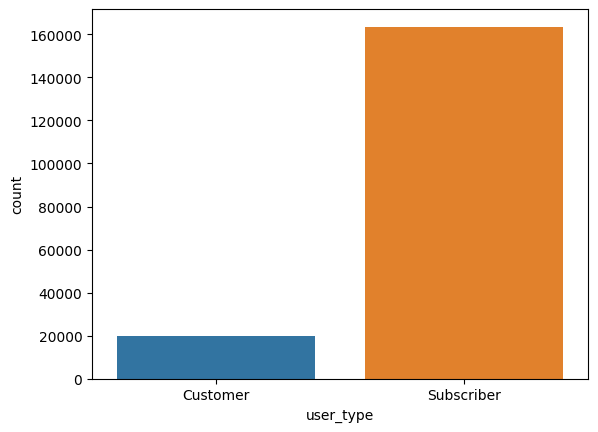

<Figure size 700x300 with 0 Axes>

In [7]:
# I'll take a look at what most GoBike user's profile is like.
sns.countplot(data=df, x='user_type')
plt.figure(figsize=(7, 3))

Most of GoBike users are subsribed to their services. The memebership includes things like goodies, discounts, exclusive events and more!

#### Question no.2: What is the average age of the users?

In [8]:
# Now I'd like to know a bit more about user's age and gender. First I'll correct the year of birth data type, year of birth
#should be int64 to perform calculus.
# First I'll fill missing values with 0.
df['member_birth_year'] = df['member_birth_year'].fillna(0).astype(int)

In [9]:
# Checking if it's correct now..
df['member_birth_year'].dtype

dtype('int64')

In [10]:
# Since I want the "age" I'll perform a simple subtraction to get this information, then I'll convert it back to string so I 
#can keep the other info later.
df['age'] = 2019 - df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,NaN,No,2019
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45


In [11]:
# Filtering people whose age is = 2019 (that's because of the replacing for 0 I did before.)
age_filter = df['age'] != 2019

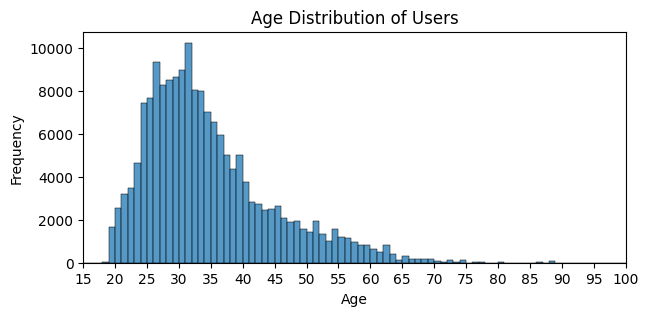

In [12]:
plt.figure(figsize=(7, 3))
sns.histplot(data=df[age_filter], x='age', bins=range(0, 101, 1))
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(15, 100)
plt.xticks(range(15, 101, 5))
plt.show()

Majority of users are adults between 25 and 35 years of age.

#### Question no.3: What are the frequencies of trips by day of the week?

In [13]:
# I will convert "age" back to an object so I can replace the ages that are '2019' with 'N/A'.
df['age'] = df['age'].astype(object)

In [14]:
df.loc[df['age'] == 2019, 'age'] = 'N/A'

In [15]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,NaN,No,N/A
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45


In [16]:
# There are a few missing values in the gender columns that can be replaced by "N/A".
print(df['member_gender'].unique())


['Male' nan 'Other' 'Female']


In [17]:
# Lastly let's take a look at the days that have the most activity.
df['start_time'] = pd.to_datetime(df['start_time'])

df['day_of_week'] = df['start_time'].dt.day_name()
day_counts = df['day_of_week'].value_counts()

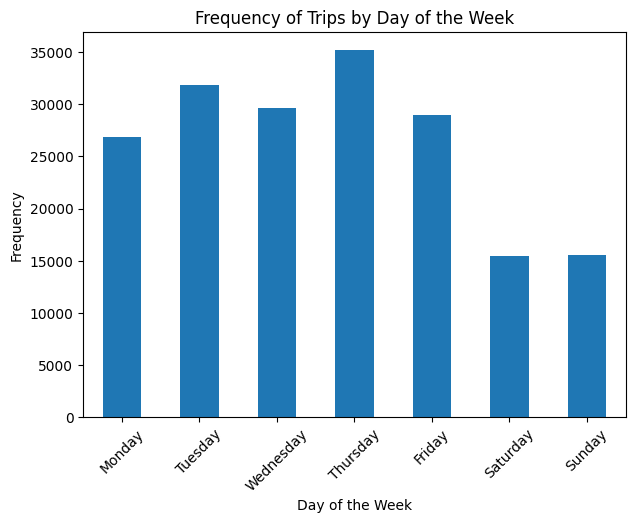

In [18]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting a bar chart with ordered days
plt.figure(figsize=(7, 5))
day_counts[order].plot(kind='bar')
plt.title('Frequency of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Looking at this chart we can see that surprisingly most people use the GoBike system during weekdays. Comparing it to the previous analysis we can assume that most of them may use the system to go to work and/or back home. When we compare this data with the time such activity occurs we can say this more correctly.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Because there is no unique identification for users in the database I assumed they were all unique, but I could have a basic notion of what the main users of the GoBike system are like. Next I will dive deeper in their users profile.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In order to perform some calculations I had to change the "member_birth_year" variable to int64. Also, for those single-variable analysis some empty (NaN or Null) values had to be dealt with. 

## Bivariate Exploration

#### When do GoBike users most frequently rent bikes during weekdays, and what does this suggest about their travel patterns?

In [19]:
#Converting "start_time and to datetime type.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [20]:
# Extracting the day name for a new column called "day_of_week".
df['day_of_week'] = df['start_time'].dt.day_name()

In [21]:
# Doing the same to the day hour.
df['hour_of_day'] = df['start_time'].dt.hour

In [22]:
# Turning those data into a table so the plot can be made more easily.
heatmap_data = df.groupby(['day_of_week', 'hour_of_day']).size().unstack()

In [23]:
heatmap_data
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


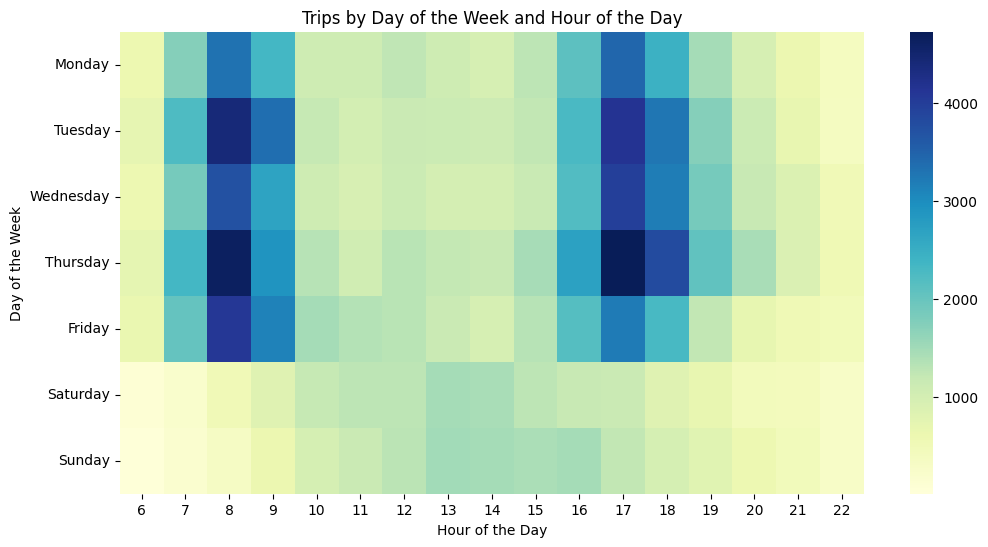

In [24]:
# Reindexing the dataframe for better visualization.
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title('Trips by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xlim(6, 23) 
# Setting a limit since there are almost no bike rides from 0-6 AM
plt.show()

Examining the darker regions of the heatmap confirms that the peak usage of GoBike occurs during 7-9 AM and 4-6 PM during weekdays, suggesting users traveling to and from work.

#### What is the typical duration of bike rentals for users of different ages?

In [25]:
# Creating a separate dataframe to store age values.
df_scatter = df[df['age'] != 'N/A'].copy()
df_scatter['age'] = df_scatter['age'].astype(int)

# Converting 'duration_sec' to numeric.
df_scatter['duration_sec'] = pd.to_numeric(df_scatter['duration_sec'], errors='coerce')

# Convert ride duration from seconds to hours
df_scatter['duration_hours'] = df_scatter['duration_sec'] / 3600  # 1 hour = 3600 seconds

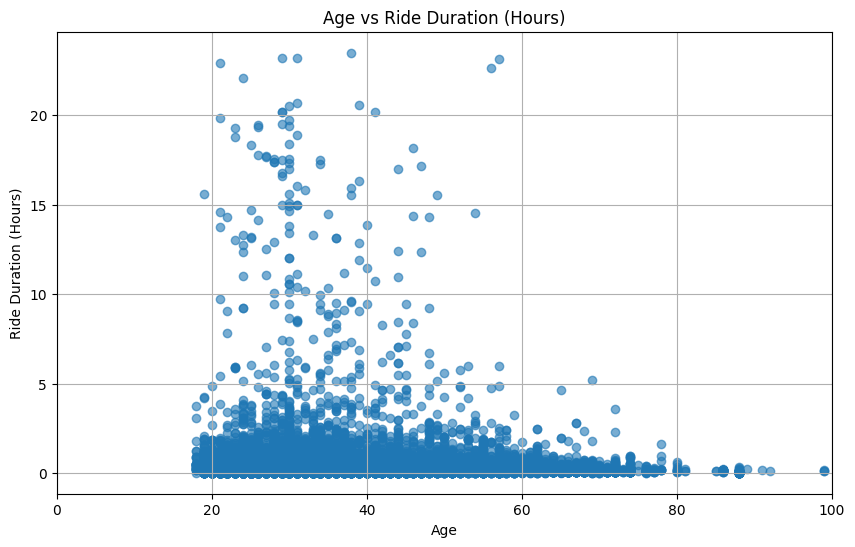

In [26]:
# Plot age versus ride duration in hours
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['age'], df_scatter['duration_hours'], alpha=0.6)
plt.title('Age vs Ride Duration (Hours)')
plt.xlabel('Age')
plt.ylabel('Ride Duration (Hours)')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

Users of all ages tend to rent bikes for rides that are typically shorter than 5 hours, with the majority using them for just a few minutes.

####  How does the age distribution vary between male and female users of the GoBike system?

In [27]:
# Creating a clean dataframe for the boxplot
df_boxplot = df[df['age'] != 'N/A'].copy()
df_boxplot.loc[:, 'age'] = df_boxplot['age'].astype(int)

/tmp/ipykernel_13/4176388339.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_boxplot.loc[:, 'age'] = df_boxplot['age'].astype(int)


In [28]:
df_boxplot = df_boxplot[df_boxplot['member_gender'].notna()]

(11.85, 147.15)

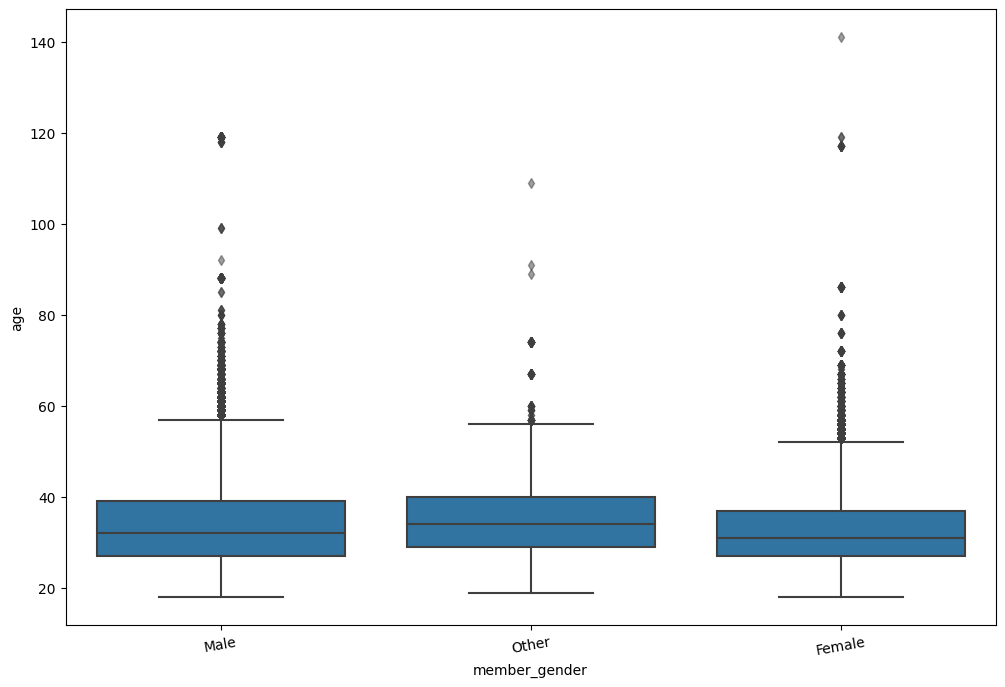

In [29]:
plt.figure(figsize=(12, 8))
axl = sns.boxplot(data=df_boxplot, x='member_gender', y='age', color='tab:blue', flierprops=dict(alpha=0.5))
plt.xticks(rotation=10)
plt.ylim(axl.get_ylim())

For both genders, the minimum age is around 20, but there are some differences in the distribution. For males, the age range is broader, with several outliers extending the maximum age to around 60. Females have a narrower age range. This suggests that while the service attracts users of various ages, there is a greater diversity of age among male users.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Peak Usage Times: The heatmap showed that the peak usage of GoBike occurs during 7-9 AM and 4-6 PM on weekdays, indicating that users mainly use the service for commuting to and from work.

> Age Distribution by Gender: Both genders have a minimum age of around 20, but males exhibit a broader diversity in age.

> Ride Duration: Regardless of age or gender, users tend to rent bikes for rides shorter than 5 hours, with the majority using them for just a few minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, I did not. I focused only on the relationships between my features of interest.

## Multivariate Exploration

#### How do the ride durations of male and female users compare across different age groups in the GoBike system?

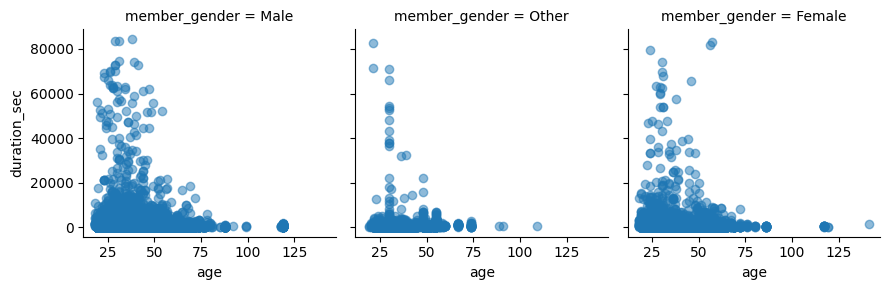

In [30]:
g = sns.FacetGrid(data=df, col='member_gender', col_wrap=3)
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.5)

The data suggests that while both male and female users predominantly opt for short rides, there are more males than females aged between 20 to 40 who tend to use the GoBike system for longer durations.

#### How does distance traveled vary concerning age, gender, and user type within the GoBike system?

In [31]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 
    return c * r

In [32]:
df['distance_km'] = haversine(df['start_station_latitude'], df['start_station_longitude'],
                               df['end_station_latitude'], df['end_station_longitude'])

In [35]:
# Rounding the distance_km column to two decimal places
df['distance_km'] = df['distance_km'].round(2)

In [36]:
agg_df = df.groupby(['age', 'member_gender', 'user_type'])['distance_km'].mean().reset_index()

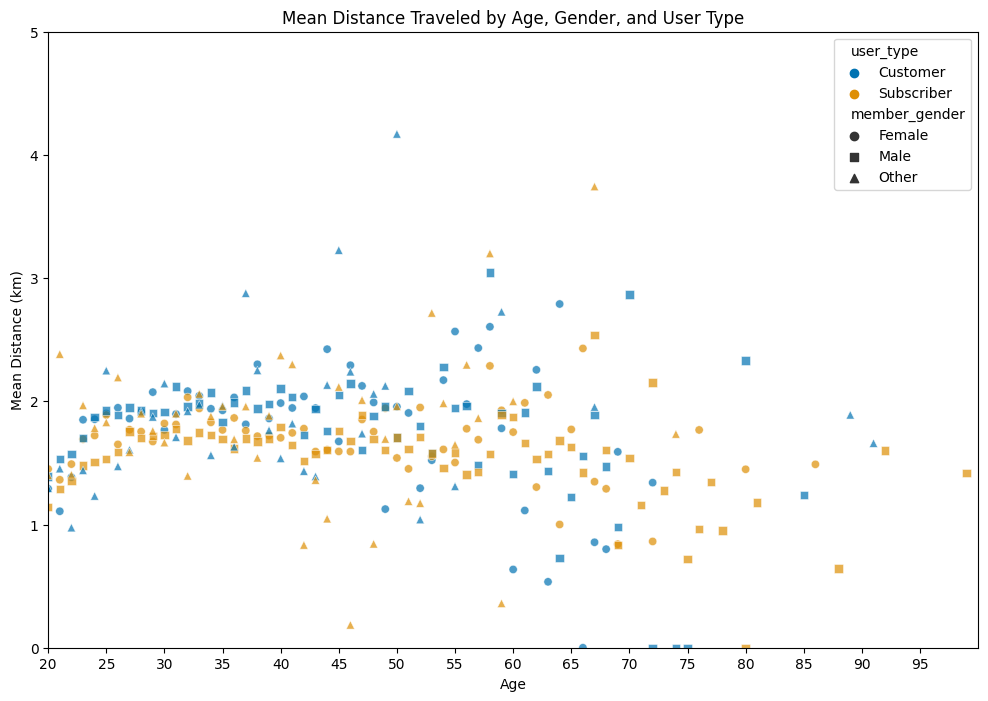

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=agg_df, x='age', y='distance_km', hue='user_type', style='member_gender', palette='colorblind', alpha=0.7, markers=['o', 's', '^'])
plt.title('Mean Distance Traveled by Age, Gender, and User Type')
plt.xlabel('Age')
plt.ylabel('Mean Distance (km)')
plt.ylim(0, 5)
plt.xlim(20, 100) 
plt.xticks(range(20, 100, 5)) 
plt.show()

In this visualization, I explore how age, gender, and user type correlate with distance traveled. While the majority of users are subscribers, non-subscribers (customers) tend to cover longer distances, likely indicating sporadic usage patterns.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I dicovered that normal customers tend to travel longer distances than subscribers, indicating that non-subscribers likely use the service sporadically for longer trips. Secondly, the age distribution analysis revealed that while both male and female users mostly use GoBike for short rides, males aged 20 to 40 tend to use the service for longer durations.

### Were there any interesting or surprising interactions between features?

> I was surprised to see that many older people use the GoBike system. It's great to see such a wide age range using the bikes since it's a great form of exercise and helps the environment!

## Conclusions

> Peak Usage Times: I found that GoBike usage peaks during mornings (7-9 AM) and evenings (4-6 PM) during  working days, suggesting that many users use the bikes for commuting to and from work.

> User profiles: The users of GoBike are mostly subscribed to the service. They vary in age and gender, but the majority are between their 20s and 40s, and men tend to use the bikes for longer periods.